Build a line plot about bird wingspan values

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
birds = pd.read_csv("Minnesota Birds.csv")
birds.head()

,Name,Scientific Name,Indicator or Other Notes,Category,State,Kingdom,Phylum,Class,Order,Family,Genus,Conservation status,Length Min (cm),Length Max (cm),Body Mass Min (g),Body Mass Max (g),Wingspan Min (cm),Wingspan Max (cm)
0,Black-bellied whistling-duck,Dendrocygna autumnalis,(A),"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,(A),"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,NaN,"Ducks, geese, and waterfowl",Minnesota,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


We want a view of the maximum wingspan for these interesting birds.

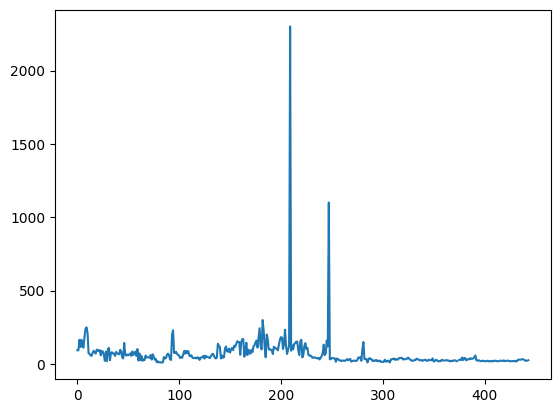

In [3]:
wingspan = birds['Wingspan Max (cm)']
wingspan.plot()
plt.show()

There seems to be at least one outlier - that's quite a wingspan! A 2300 centimeter wingspan equals 23 meters - are there Pterodactyls roaming Minnesota? Let's investigate.

While you could do a quick sort in Excel to find those outliers, which are probably typos, continue the visualization process by working from within the plot.

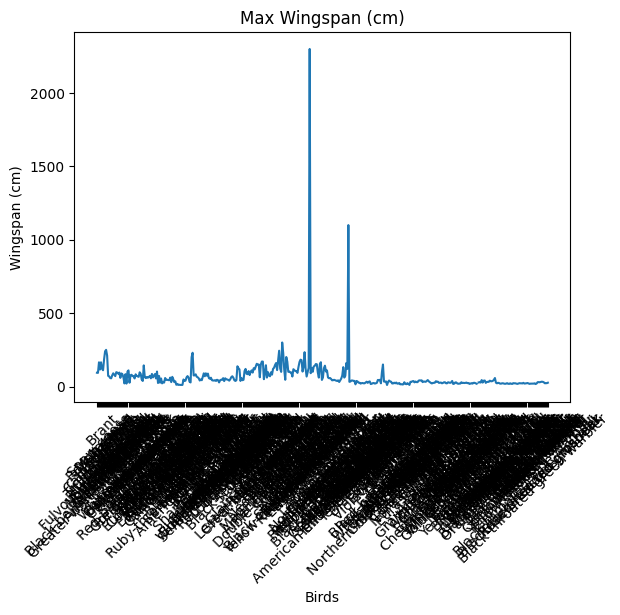

In [6]:
plt.title("Max Wingspan (cm)")
plt.xlabel("Birds")
plt.ylabel("Wingspan (cm)")
plt.xticks(rotation=45)
x = birds['Name']
y = birds['Wingspan Max (cm)']
plt.plot(x, y)
plt.show()

Even with the rotation of the labels set to 45 degrees, there are too many to read. We try a different strategy: label only those outliers and set the labels within the chart. You can use a scatter chart to make more room for the labeling:

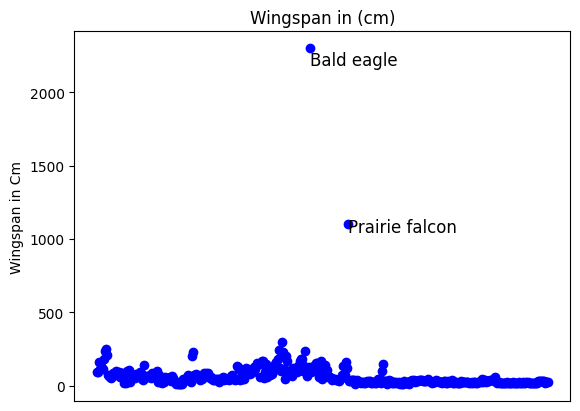

In [7]:
plt.title("Wingspan in (cm)")
plt.ylabel("Wingspan in Cm")
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['Wingspan Max (cm)'][i]
    plt.plot(x , y, 'bo')
    if birds['Wingspan Max (cm)'][i] > 500:
        plt.text(x,y * (1-0.05),birds['Name'][i], fontsize=12)
plt.show()

Filter your data
Both the Bald Eagle and the Prairie Falcon, while probably very large birds, appear to be mislabeled, with an extra 0 added to their maximum wingspan. It's unlikely that you'll meet a Bald Eagle with a 25 meter wingspan, but if so, let us know! Let's create a new dataframe without those two outliers:

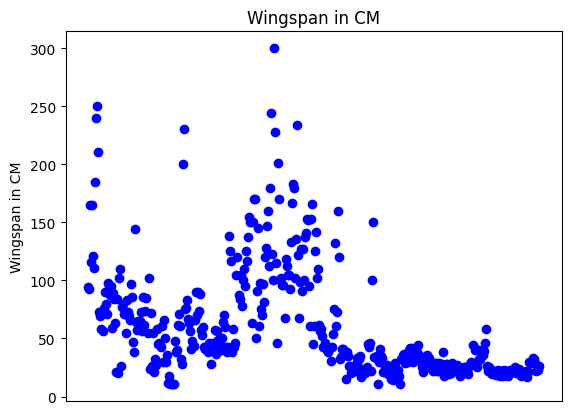

In [10]:
plt.title("Wingspan in CM")
plt.ylabel("Wingspan in CM")
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds["Wingspan Max (cm)"][i]

    if birds['Name'][i] not in ['Bald eagle','Prairie falcon']:
        plt.plot(x , y, 'bo')
plt.show()

Now  we have a cleaner dataset at least in terms of wingspan, we can discover more about these birds.

While line and scatter plots can display information about data values and their distributions, we want to think about the values inherent in this dataset. You could create visualizations to answer the following questions about quantity:

How many categories of birds are there, and what are their numbers? How many birds are extinct, endangered, rare, or common? How many are there of the various genus and orders in Linnaeus's terminology?

Explore bar charts
Bar charts are practical when you need to show groupings of data. Let's explore the categories of birds that exist in this dataset to see which is the most common by number.

<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Category'>

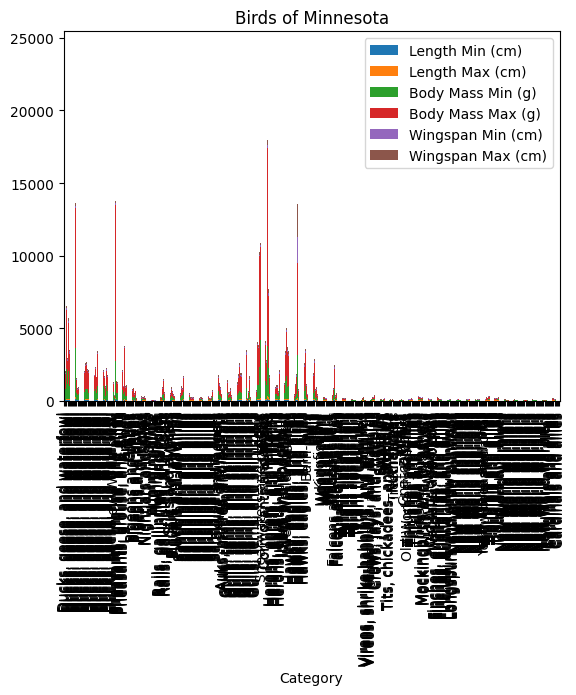

In [12]:
birds.plot(
    x = 'Category',
    kind = 'bar',
    stacked = True,
    title = 'Birds of Minnesota'
)

This bar chart, however, is unreadable because there is too much non-grouped data. You need to select only the data that you want to plot, so let's look at the length of birds based on their category.

Filter your data to include only the bird's category.

✅ Notice that you use Pandas to manage the data, and then let Matplotlib do the charting.

Since there are many categories, you can display this chart vertically and tweak its height to account for all the data:

<Axes: >

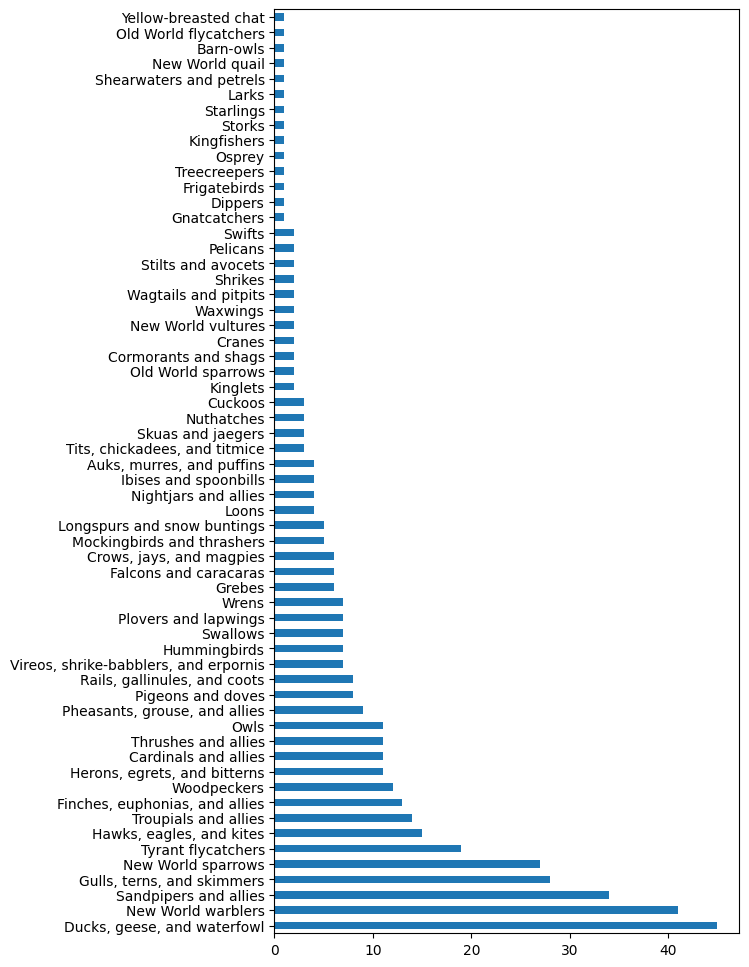

In [14]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6,12]
category_count.plot.barh()

This bar chart shows a good view of the number of birds in each category. In a blink of an eye, you see that the largest number of birds in this region are in the Ducks/Geese/Waterfowl category. Minnesota is the 'land of 10,000 lakes' so this isn't surprising!

✅ Try some other counts on this dataset. Does anything surprise you?

Comparing data

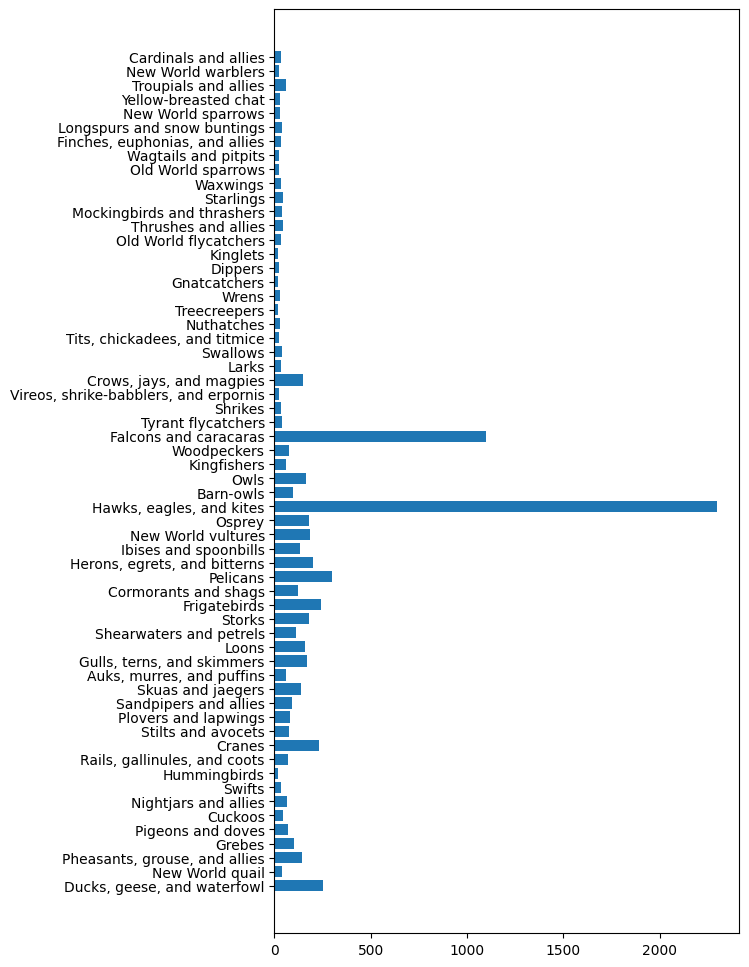

In [16]:
maxlength = birds['Wingspan Max (cm)']
plt.barh(y=birds['Category'],width=maxlength)
plt.rcParams['figure.figsize'] = [6,12]
plt.show()

Nothing is surprising here: hummingbirds have the least MaxLength compared to Pelicans or Geese. It's good when data makes logical sense!

You can create more interesting visualizations of bar charts by superimposing data. Let's superimpose Minimum and Maximum Length on a given bird category:

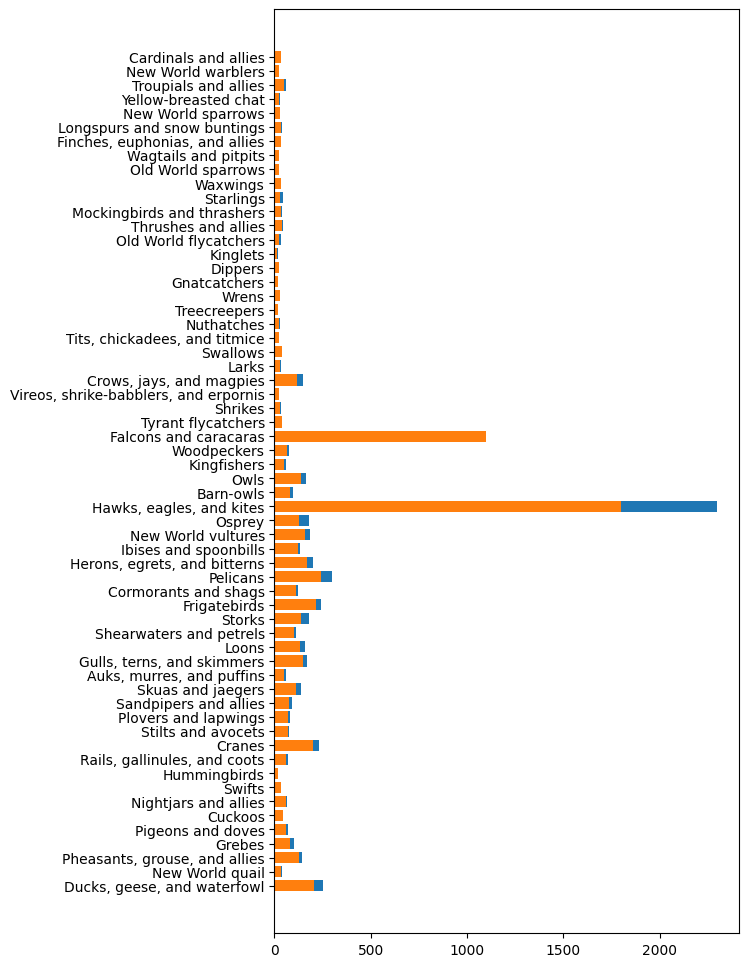

In [18]:
maxLength = birds['Wingspan Max (cm)']
minLength = birds['Wingspan Min (cm)']
category = birds['Category']

plt.barh(category,maxLength)
plt.barh(category,minLength)

plt.show()